In [1]:
from fastai.vision.all import *
import librosa
import librosa.display
from IPython.display import Audio

In [2]:
DATA = Path('../../data')
AUDIO_TAGGING = DATA/'freesound-audio-tagging'
AUDIO_RECORDINGS = AUDIO_TAGGING/'audio_train'
dst_path = DATA/'free-sound/train'
dst_path.ls()

(#41) [Path('../../data/free-sound/train/Saxophone'),Path('../../data/free-sound/train/Cello'),Path('../../data/free-sound/train/Meow'),Path('../../data/free-sound/train/Bus'),Path('../../data/free-sound/train/Laughter'),Path('../../data/free-sound/train/Chime'),Path('../../data/free-sound/train/Bark'),Path('../../data/free-sound/train/Burping_or_eructation'),Path('../../data/free-sound/train/Bass_drum'),Path('../../data/free-sound/train/Harmonica')...]

In [3]:
AUDIO_RECORDINGS.ls()

(#9473) [Path('../../data/freesound-audio-tagging/audio_train/2a871432.wav'),Path('../../data/freesound-audio-tagging/audio_train/704d6fc7.wav'),Path('../../data/freesound-audio-tagging/audio_train/f5729f4f.wav'),Path('../../data/freesound-audio-tagging/audio_train/84d0e459.wav'),Path('../../data/freesound-audio-tagging/audio_train/0b3c0588.wav'),Path('../../data/freesound-audio-tagging/audio_train/56a59a85.wav'),Path('../../data/freesound-audio-tagging/audio_train/f8742dce.wav'),Path('../../data/freesound-audio-tagging/audio_train/1f4a7bfe.wav'),Path('../../data/freesound-audio-tagging/audio_train/151b80e7.wav'),Path('../../data/freesound-audio-tagging/audio_train/c3015f33.wav')...]

In [4]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [5]:
dls = dblock.dataloaders(dst_path)

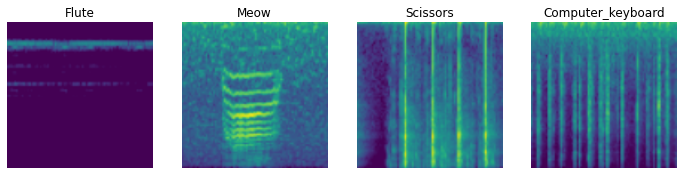

In [6]:
dls.valid.show_batch(max_n=4, nrows=1)

In [7]:
dls.one_batch()

(TensorImage([[[[0.3255, 0.3255, 0.3294,  ..., 0.2706, 0.2706, 0.2706],
           [0.3255, 0.3255, 0.3294,  ..., 0.2706, 0.2706, 0.2706],
           [0.3451, 0.3451, 0.3490,  ..., 0.2706, 0.2706, 0.2706],
           ...,
           [0.5529, 0.5529, 0.5569,  ..., 0.2667, 0.2667, 0.2667],
           [0.5529, 0.5529, 0.5529,  ..., 0.2667, 0.2667, 0.2667],
           [0.5529, 0.5529, 0.5529,  ..., 0.2667, 0.2667, 0.2667]],
 
          [[0.7725, 0.7725, 0.7725,  ..., 0.2118, 0.2118, 0.2118],
           [0.7725, 0.7725, 0.7725,  ..., 0.2118, 0.2118, 0.2118],
           [0.7804, 0.7804, 0.7804,  ..., 0.2078, 0.2078, 0.2078],
           ...,
           [0.8392, 0.8392, 0.8392,  ..., 0.2157, 0.2196, 0.2196],
           [0.8392, 0.8392, 0.8392,  ..., 0.2118, 0.2157, 0.2157],
           [0.8392, 0.8392, 0.8392,  ..., 0.2118, 0.2157, 0.2157]],
 
          [[0.4039, 0.4039, 0.4039,  ..., 0.5059, 0.5059, 0.5059],
           [0.4039, 0.4039, 0.4039,  ..., 0.5059, 0.5059, 0.5059],
           [0.3922,

In [8]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy])

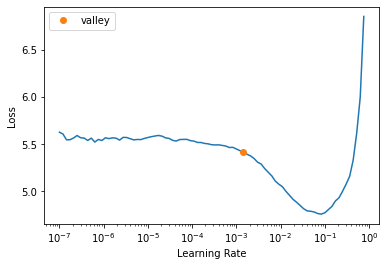

In [9]:
lr = learn.lr_find()

In [10]:
learn.fine_tune(8, lr.valley)

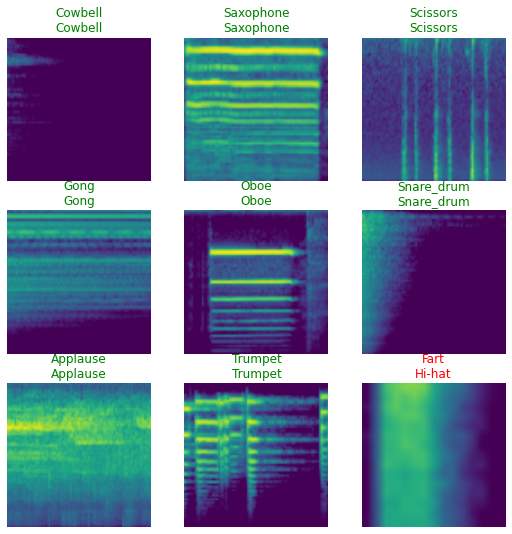

In [11]:
learn.show_results()

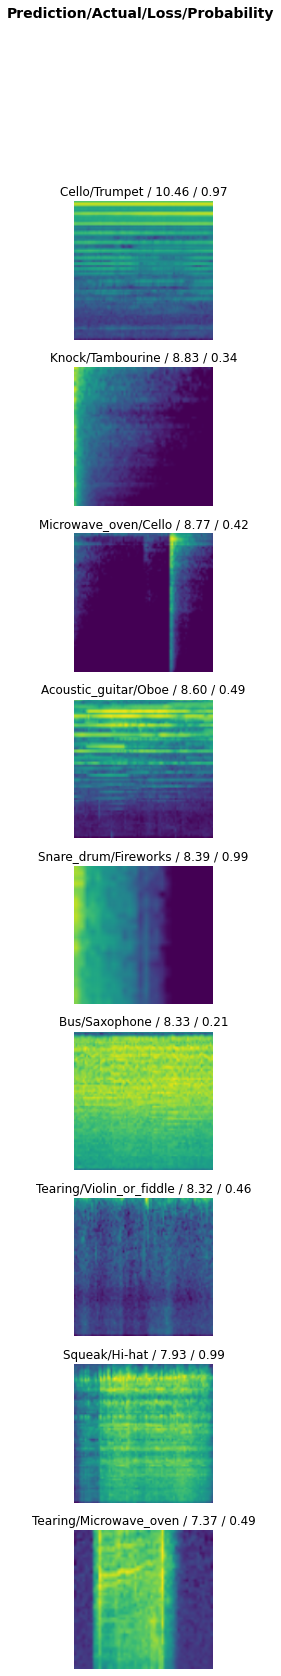

In [12]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9,nrows=9)

In [20]:
losses,idxs = interp.top_losses(9)
top_losses = [(dls.valid_ds.items[x]) for x in idxs]
for x in top_losses:
    filename = Path(x.name.split(".")[0])
    directory = AUDIO_RECORDINGS
    for file in os.listdir(directory):
        if str(filename) in file:
            print(f'{x.parent.name}')
            display(Audio(directory/file))

Trumpet


Tambourine


Cello


Oboe


Fireworks


Saxophone


Violin_or_fiddle


Hi-hat


Microwave_oven


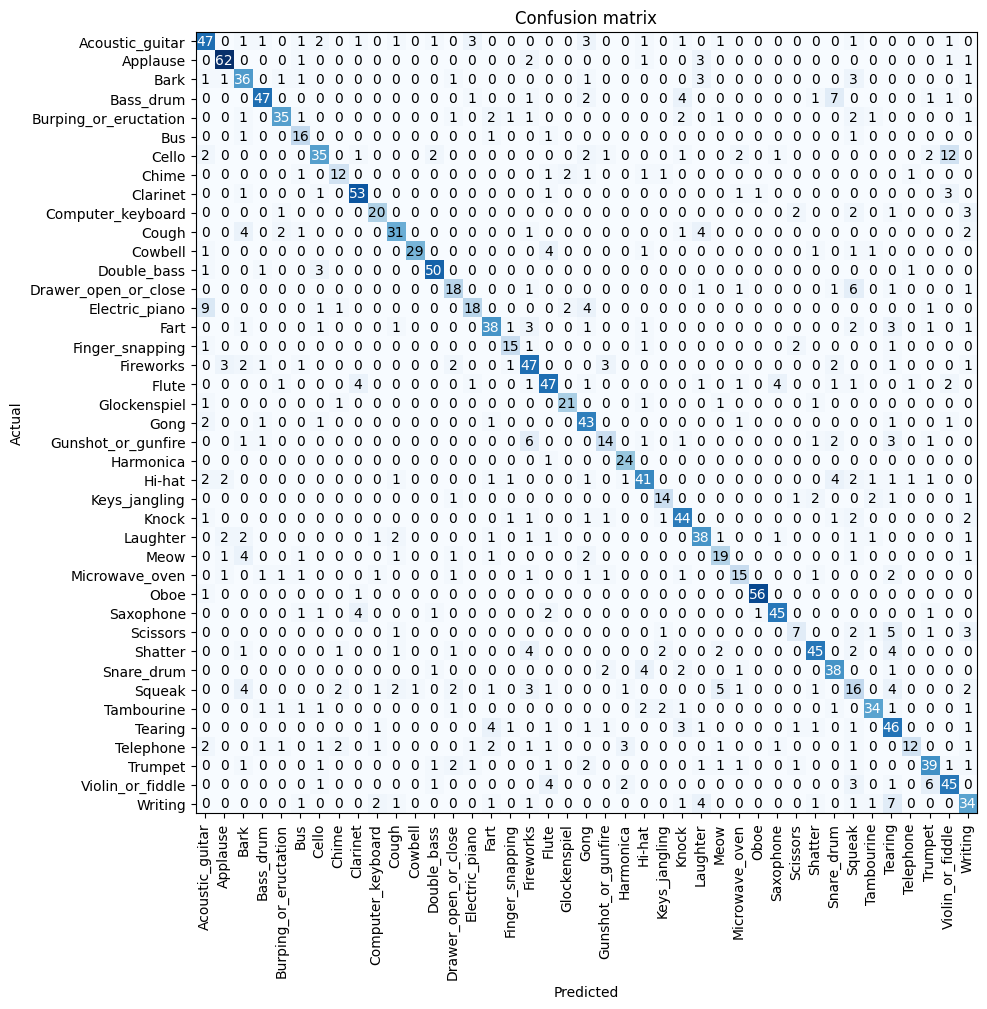

In [21]:
a = ClassificationInterpretation.from_learner(learn)
a.plot_confusion_matrix(figsize=(10,10), dpi = 100)

In [15]:
learn.export('../models/model_V2.pkl')